# Pilot Scan 2 - 6/27/18

## Scan Notes
We collected the following scans that can be found in `.../b2b/data/Raw/Subject002`

* MPRAGE - Anatomical
* 0000 - full run, REST vs finger tapping
* 0001 - short run, REST vs finger tapping
* 0002 - short run, REST vs finger tapping
* 0003 - full run, REST vs imagined tapping
* 0004 - short run, REST vs imagined tapping
* 0005 - short run, REST vs imagined tapping

All functional scans used the same parameters:

* TR: 2sec
* vol dimensions: (64,64,30)
* nTimepts: *full run*-132; *short run*-68  (+ 2 dummy timepts at start of run)

The data from the actual scan session can be found in `.../b2b/pilotScans/pilot2_real`. All offline simulations and testing of different parameters should use the data found in `.../bsb/pilotScans/pilot2_offline`

During the scan session, we:

1. ran a GLM on `0000` that modeled active>0. 
2. Extracted the peak voxel: 28 31 26
3. Build a 5mm sphere around that peak (However, we accidently used the wrong ref volume in building this mask, so it didn't work as expected. Instead, we used the full brain mask from the feat output directory for subsequent steps
4. Ran the `classifyLocalizer.py` script to train and save a classifier. Using whole brain mask, mean classification accuracy was 66%.
5. Loaded the saved classifier into the Pyneal custom analysis script along with whole brain mask. 
6. Ran 2 short runs in real-time. During runs, each volume was classified and the if the prob > 50% a trigger was sent ot the TMS server running up in Guthrie

Two Pyneal runs: `pyneal_021`, `pyneal_022`

We also collected a full run and two short runs using the motor imagery task, but these were not analyzed in real-time

In [4]:
import os
from os.path import join

import nibabel as nib
import numpy as np
import pandas as pd
from nilearn.masking import apply_mask

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
rawDir = '../../data/raw/Subject002/'
rtDir = '../../pilotScans/pilot2_offline/'
timingDir = join(rtDir, 'timingFiles')

# Full Run - Finger Tapping Analysis

In [50]:
def plotRaw(maskFile, runType):
    """ Plot the raw timecourse from the supplied mask
    
    Parameters
    ----------
    maskFile : string
        full path to the mask you want to extract raw signal from
    runType : string {'motor', 'imagery'}
    
    """
    # start the plot
    fig, axs = plt.subplots(3, 1, figsize=(15,10))
    plt.suptitle('{} Activation - {}'.format(runType.capitalize(), os.path.split(maskFile)[-1]), fontsize=24)
    
    # set colors
    if runType == 'motor':
        spanColor = 'dodgerBlue'
        lineColor = 'dodgerBlue'
    elif runType == 'imagery':
        spanColor = 'goldenrod'
        lineColor = 'goldenrod'
        
    # load the mask
    mask = nib.load(maskFile)
    
    # trial times
    restOnsets = np.array([(x*32)+4 for x in range(8)]) 
    activeOnsets = restOnsets + 16
    
    for i, run in enumerate(['0000', '0001', '0002']):
        
        # load and mask the func data
        funcFile = join(rtDir,('func_' + run + '.nii.gz') )
        maskedData = apply_mask(funcFile, mask)
        
        # calculate mean timeseries within mask
        meanTS = np.mean(maskedData, axis=1)
        
        # plot 
        x = np.arange(0, maskedData.shape[0]*2, 2)
        axs[i].plot(x, meanTS, '-o', color=lineColor)
        
        # spans
        theseRest = restOnsets[restOnsets < x[-1]]
        for r in theseRest:
            axs[i].axvspan(r, r+16, facecolor='gray', edgecolor='none', alpha=0.2)
        
        theseActive = activeOnsets[activeOnsets < x[-1]]
        for a in theseActive:
            axs[i].axvspan(a, a+16, facecolor=spanColor, edgecolor='none', alpha=0.2)

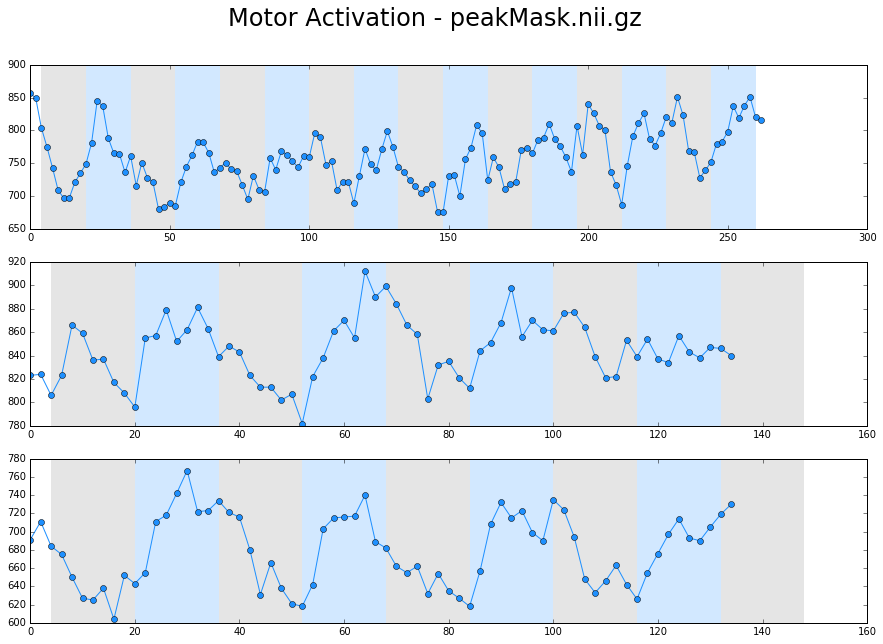

In [51]:
plotRaw(join(rtDir, 'peakMask.nii.gz'), 'motor')

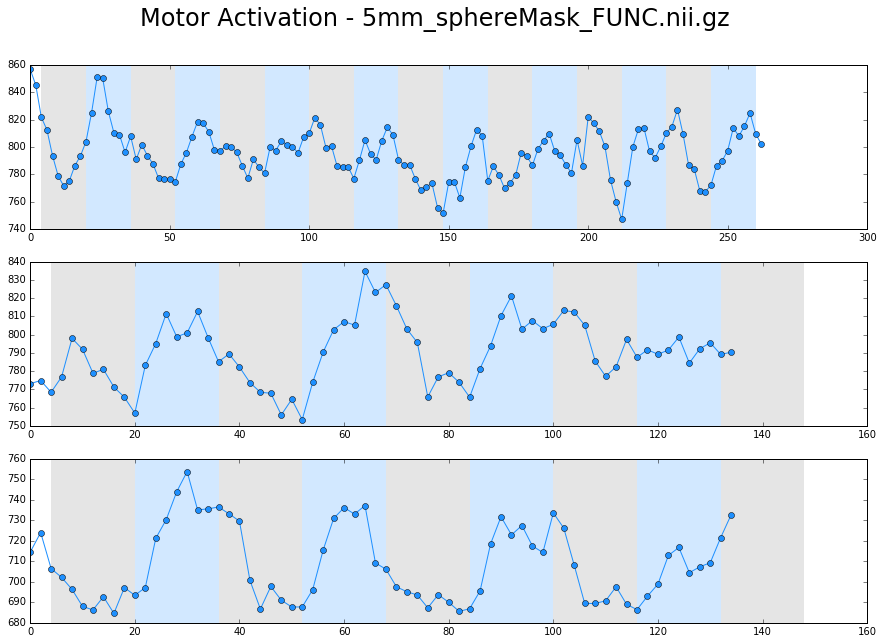

In [53]:
plotRaw(join(rtDir, '5mm_sphereMask_FUNC.nii.gz'), 'motor')

In [31]:
rest = np.array([(x*32)+4 for x in range(8)])
active = rest + 16

In [46]:
a = join(rtDir, 'peakMask.nii.gz')

In [47]:
a

'../../pilotScans/pilot2_offline/peakMask.nii.gz'

In [49]:
os.path.split(a)[-1]

'peakMask.nii.gz'

In [35]:
active[active<116]

array([20, 52, 84])

In [34]:
active-rest

array([16, 16, 16, 16, 16, 16, 16, 16])